In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv("metro-bike-share-trips-2016-q4.csv")
df2 = pd.read_csv("MetroBikeShare_2016_Q3_trips.csv")
df3 = pd.read_csv("la_metro_gbfs_trips_Q1_2017.csv")
df4 = pd.read_csv("la_metro_gbfs_trips_Q2_2017.csv")
df5 = pd.read_csv("metro-bike-share-trips-2017-q3.csv")
df6 = pd.read_csv("metro-bike-share-trips-2017-q4-v2.csv")
df7 = pd.read_csv("metro-bike-share-trips-2018-q1.csv")
df8 = pd.read_csv("metro-bike-share-trips-2018-q2.csv")
df9 = pd.read_csv("metro-bike-share-trips-2018-q3.csv")
df10 = pd.read_csv("metro-bike-share-trips-2018-q4.csv")

In [4]:
data = pd.concat([df1, df2 , df3, df4, df5, df6, df7, df8, df9, df10], axis=0)
data["Date"] = pd.to_datetime(data["Start_Time"])
data = data.set_index("Date")
data = data.sort_index()

In [5]:
data["Date"] = data.index.date

In [6]:
df = data[["Date", "Trip_Id"]]

In [7]:
data_by_date = df.groupby(by= "Date").count()

In [8]:
data_by_date.to_csv("Data_by_date.csv")

In [9]:
data["Week"] = data.index.weekofyear

In [10]:
data.to_csv("Data_time_stamp.csv")

In [11]:
data_2016 = data['2016']
data_2017 = data["2017"]
data_2018 = data["2018"]
data_2017["Month"] = np.array(list(data_2017.index.month)) + np.array([12]*data_2017.shape[0])
data_2018["Month"] = np.array(list(data_2018.index.month)) + np.array([24]*data_2018.shape[0])
data = pd.concat([data_2016, data_2017, data_2018], axis= 0)

In [12]:
data_2016 = data['2016']
data_2017 = data["2017"]
data_2018 = data["2018"]
data_2017["Week"] = np.array(list(data_2017.index.weekofyear)) + np.array([52]*data_2017.shape[0])
data_2018["Week"] = np.array(list(data_2018.index.weekofyear)) + np.array([104]*data_2018.shape[0])
data = pd.concat([data_2016, data_2017, data_2018], axis= 0)

In [13]:
df = data.groupby(by="Week", axis =0).count()

In [14]:
df = pd.read_csv("month_data.csv")
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index("Month")

### Test of Stationarity 

This function will check the stationarity of the timeseries data. 
The function will plot the timeseries data and do the Dickey Fuller test. 

In [179]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    figure(num=None, figsize=(10, 7), dpi=300, facecolor='w', edgecolor='k')
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel("Time", fontsize= 10);
    plt.ylabel("Number of Bikes Booked per day", fontsize= 10);
    plt.tick_params(axis='x', rotation=45)
    plt.xticks()
    plt.savefig("Dicky_fuller.png")
    
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    display(dfoutput)

Results of Dickey-Fuller Test:


Test Statistic                  -2.087769
p-value                          0.249461
#Lags Used                      13.000000
Number of Observations Used    894.000000
Critical Value (1%)             -3.437686
Critical Value (5%)             -2.864778
Critical Value (10%)            -2.568494
dtype: float64

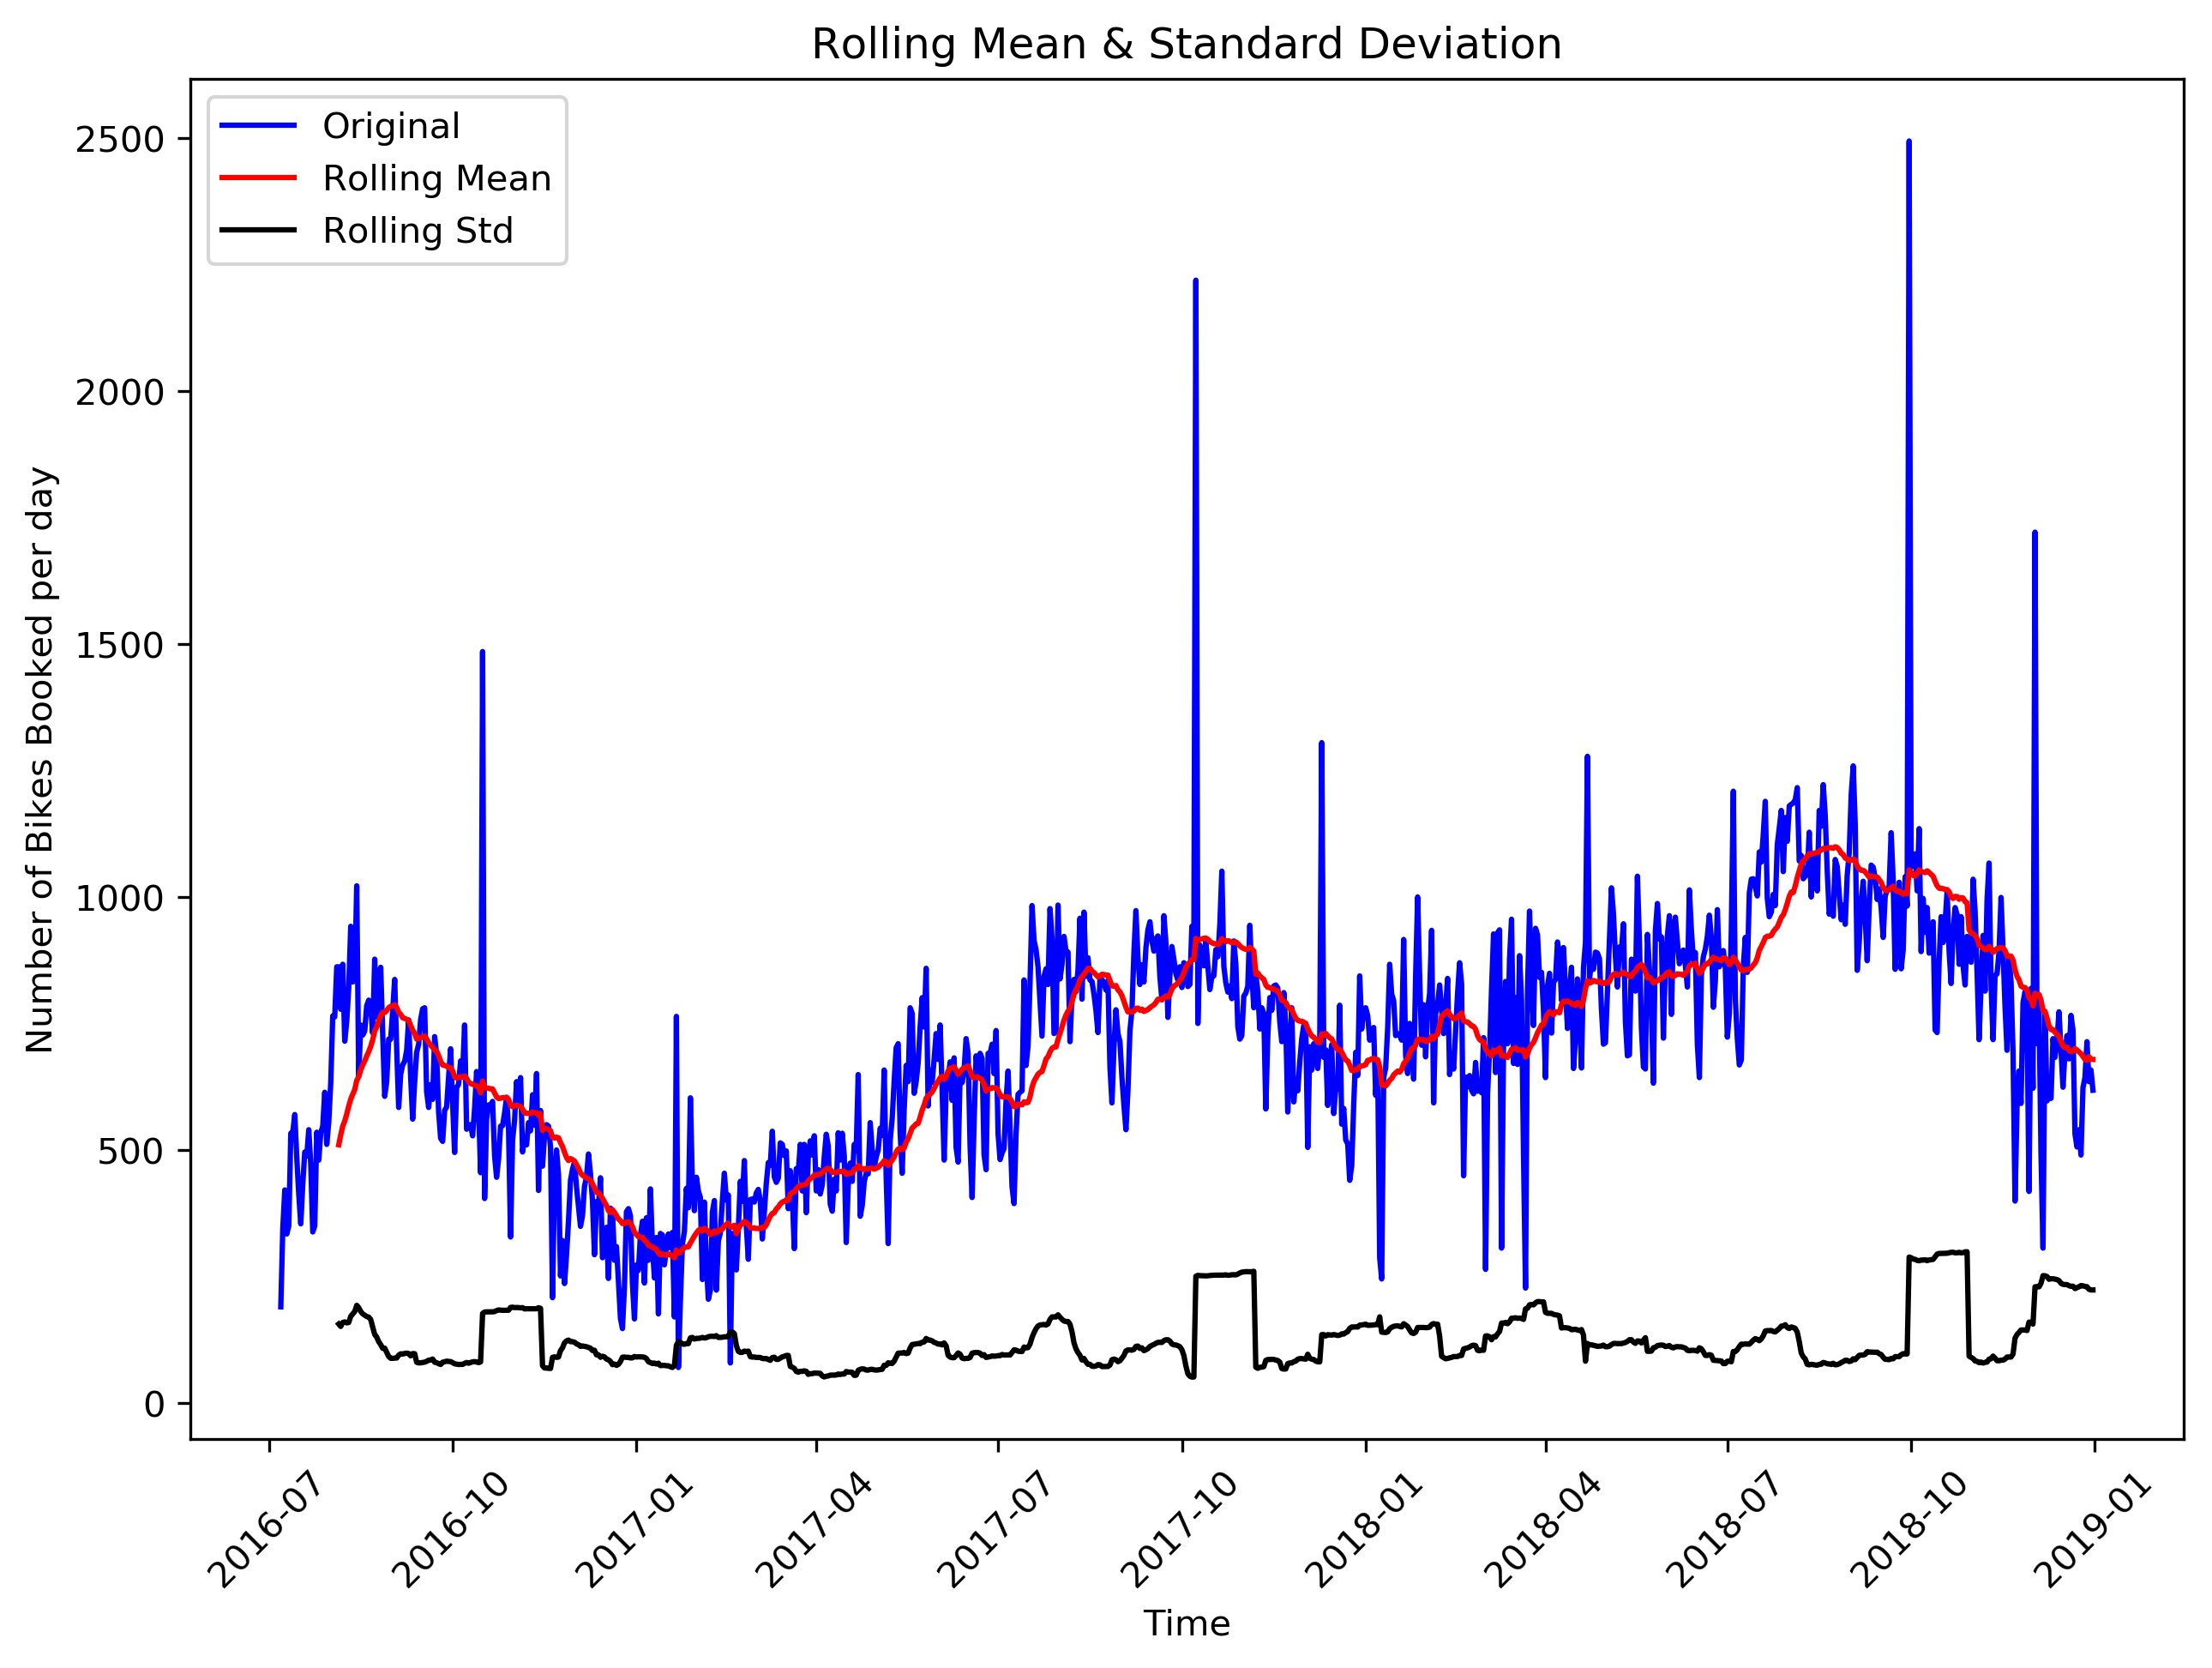

In [180]:
## Applying DickyFuller Test
df = pd.read_csv("Data_by_date.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
y = df.Trip_Id
ts = pd.Series(data= list(y) , index = df.index)
test_stationarity(ts, 30)

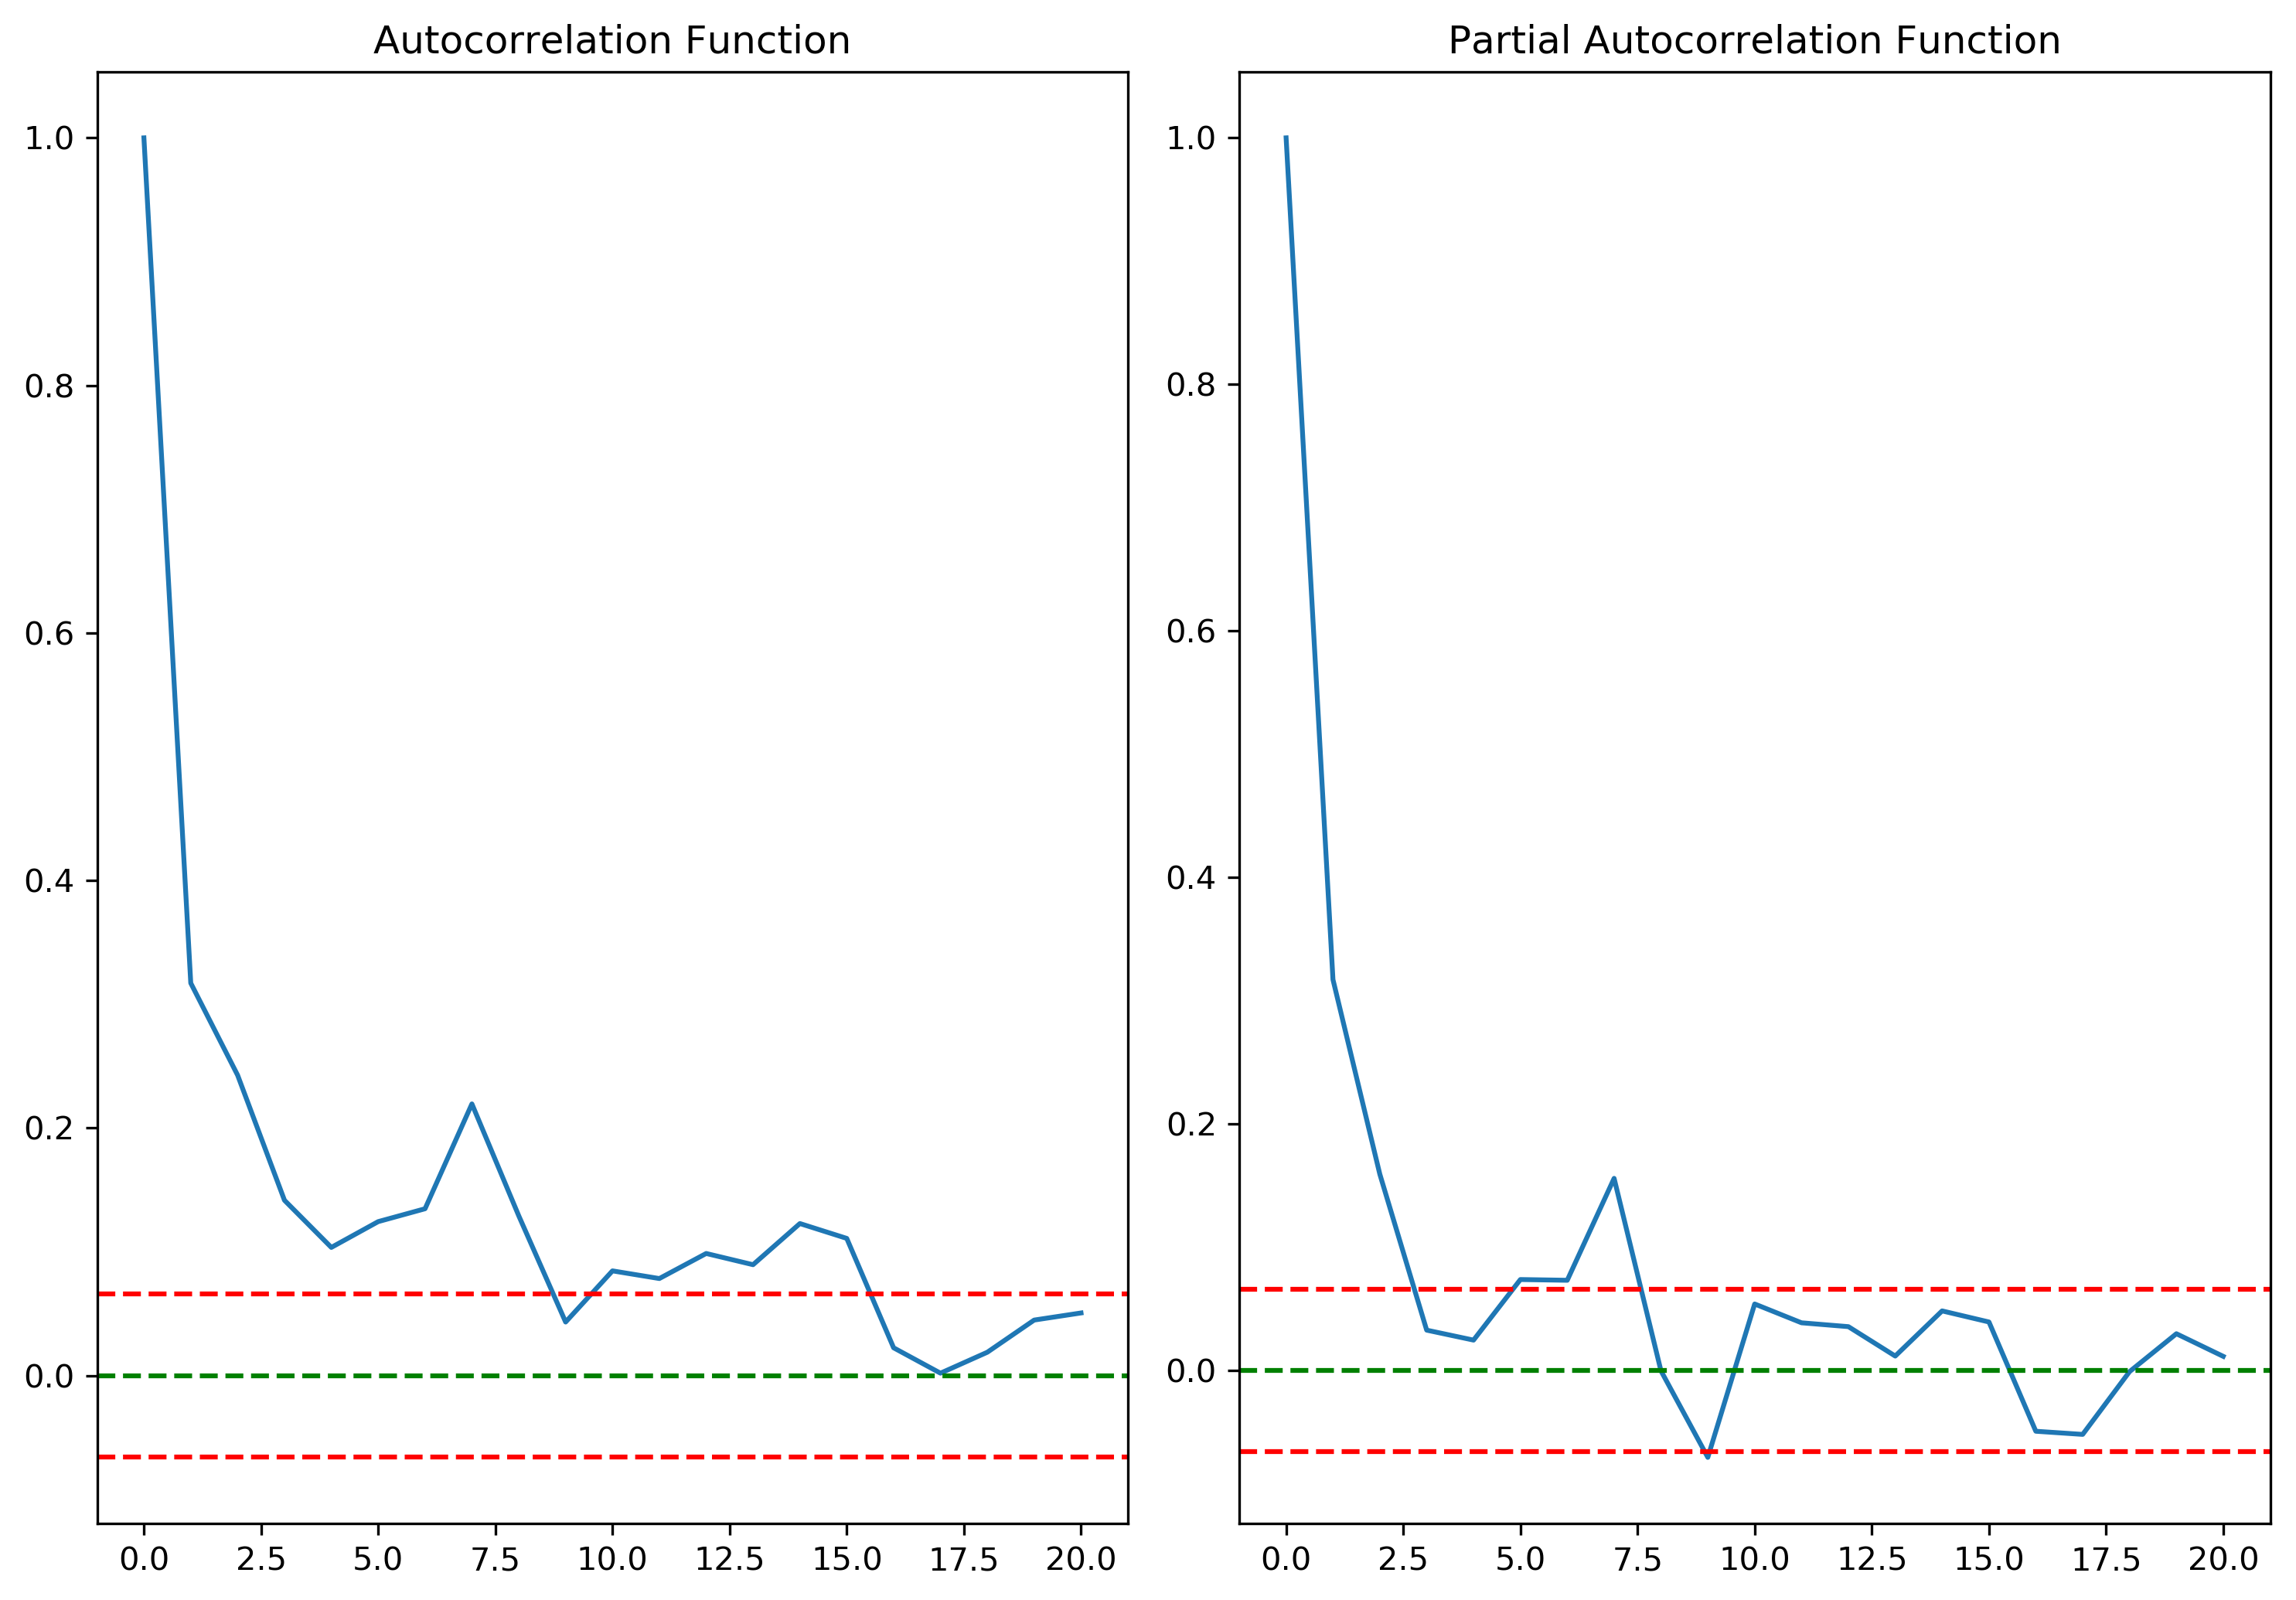

In [197]:
## Applying ACF and PACF 
ts_log, ts_log_diff = log_shift(ts, 1)
ACF_PACF(ts_log)

## ACF = 8 = q
## PACF = 2 = p

In [263]:
 ts_log_diff[:17] , ts_log_diff.cumsum()[:17]

(Date
 2016-07-08    0.596520
 2016-07-09    0.199088
 2016-07-10   -0.231492
 2016-07-11    0.046792
 2016-07-12    0.420588
 2016-07-13    0.003745
 2016-07-14    0.063370
 2016-07-15   -0.163551
 2016-07-16   -0.161062
 2016-07-17   -0.151726
 2016-07-18    0.201441
 2016-07-19    0.135838
 2016-07-20   -0.016261
 2016-07-21    0.101254
 2016-07-22   -0.136711
 2016-07-23   -0.331812
 2016-07-24    0.034887
 dtype: float64, Date
 2016-07-08    0.596520
 2016-07-09    0.795609
 2016-07-10    0.564117
 2016-07-11    0.610909
 2016-07-12    1.031497
 2016-07-13    1.035243
 2016-07-14    1.098612
 2016-07-15    0.935061
 2016-07-16    0.773999
 2016-07-17    0.622273
 2016-07-18    0.823714
 2016-07-19    0.959552
 2016-07-20    0.943291
 2016-07-21    1.044545
 2016-07-22    0.907834
 2016-07-23    0.576022
 2016-07-24    0.610909
 dtype: float64)

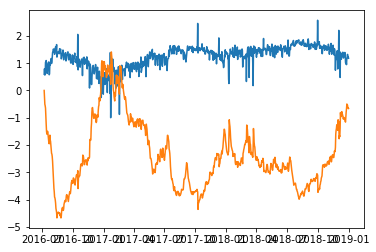

In [265]:
plt.plot(ts_log_diff.cumsum())
plt.plot(predictions_ARIMA_diff.cumsum())

RSS of the model is = 38.73349805328526
Date
2016-07-08    0.000552
2016-07-09   -0.249102
2016-07-10   -0.236121
2016-07-11   -0.045980
2016-07-12   -0.113573
dtype: float64
Date
2016-07-08    0.000552
2016-07-09   -0.248550
2016-07-10   -0.484671
2016-07-11   -0.530651
2016-07-12   -0.644224
dtype: float64


Text(0.5, 1.0, 'RMSE: 724.5118')

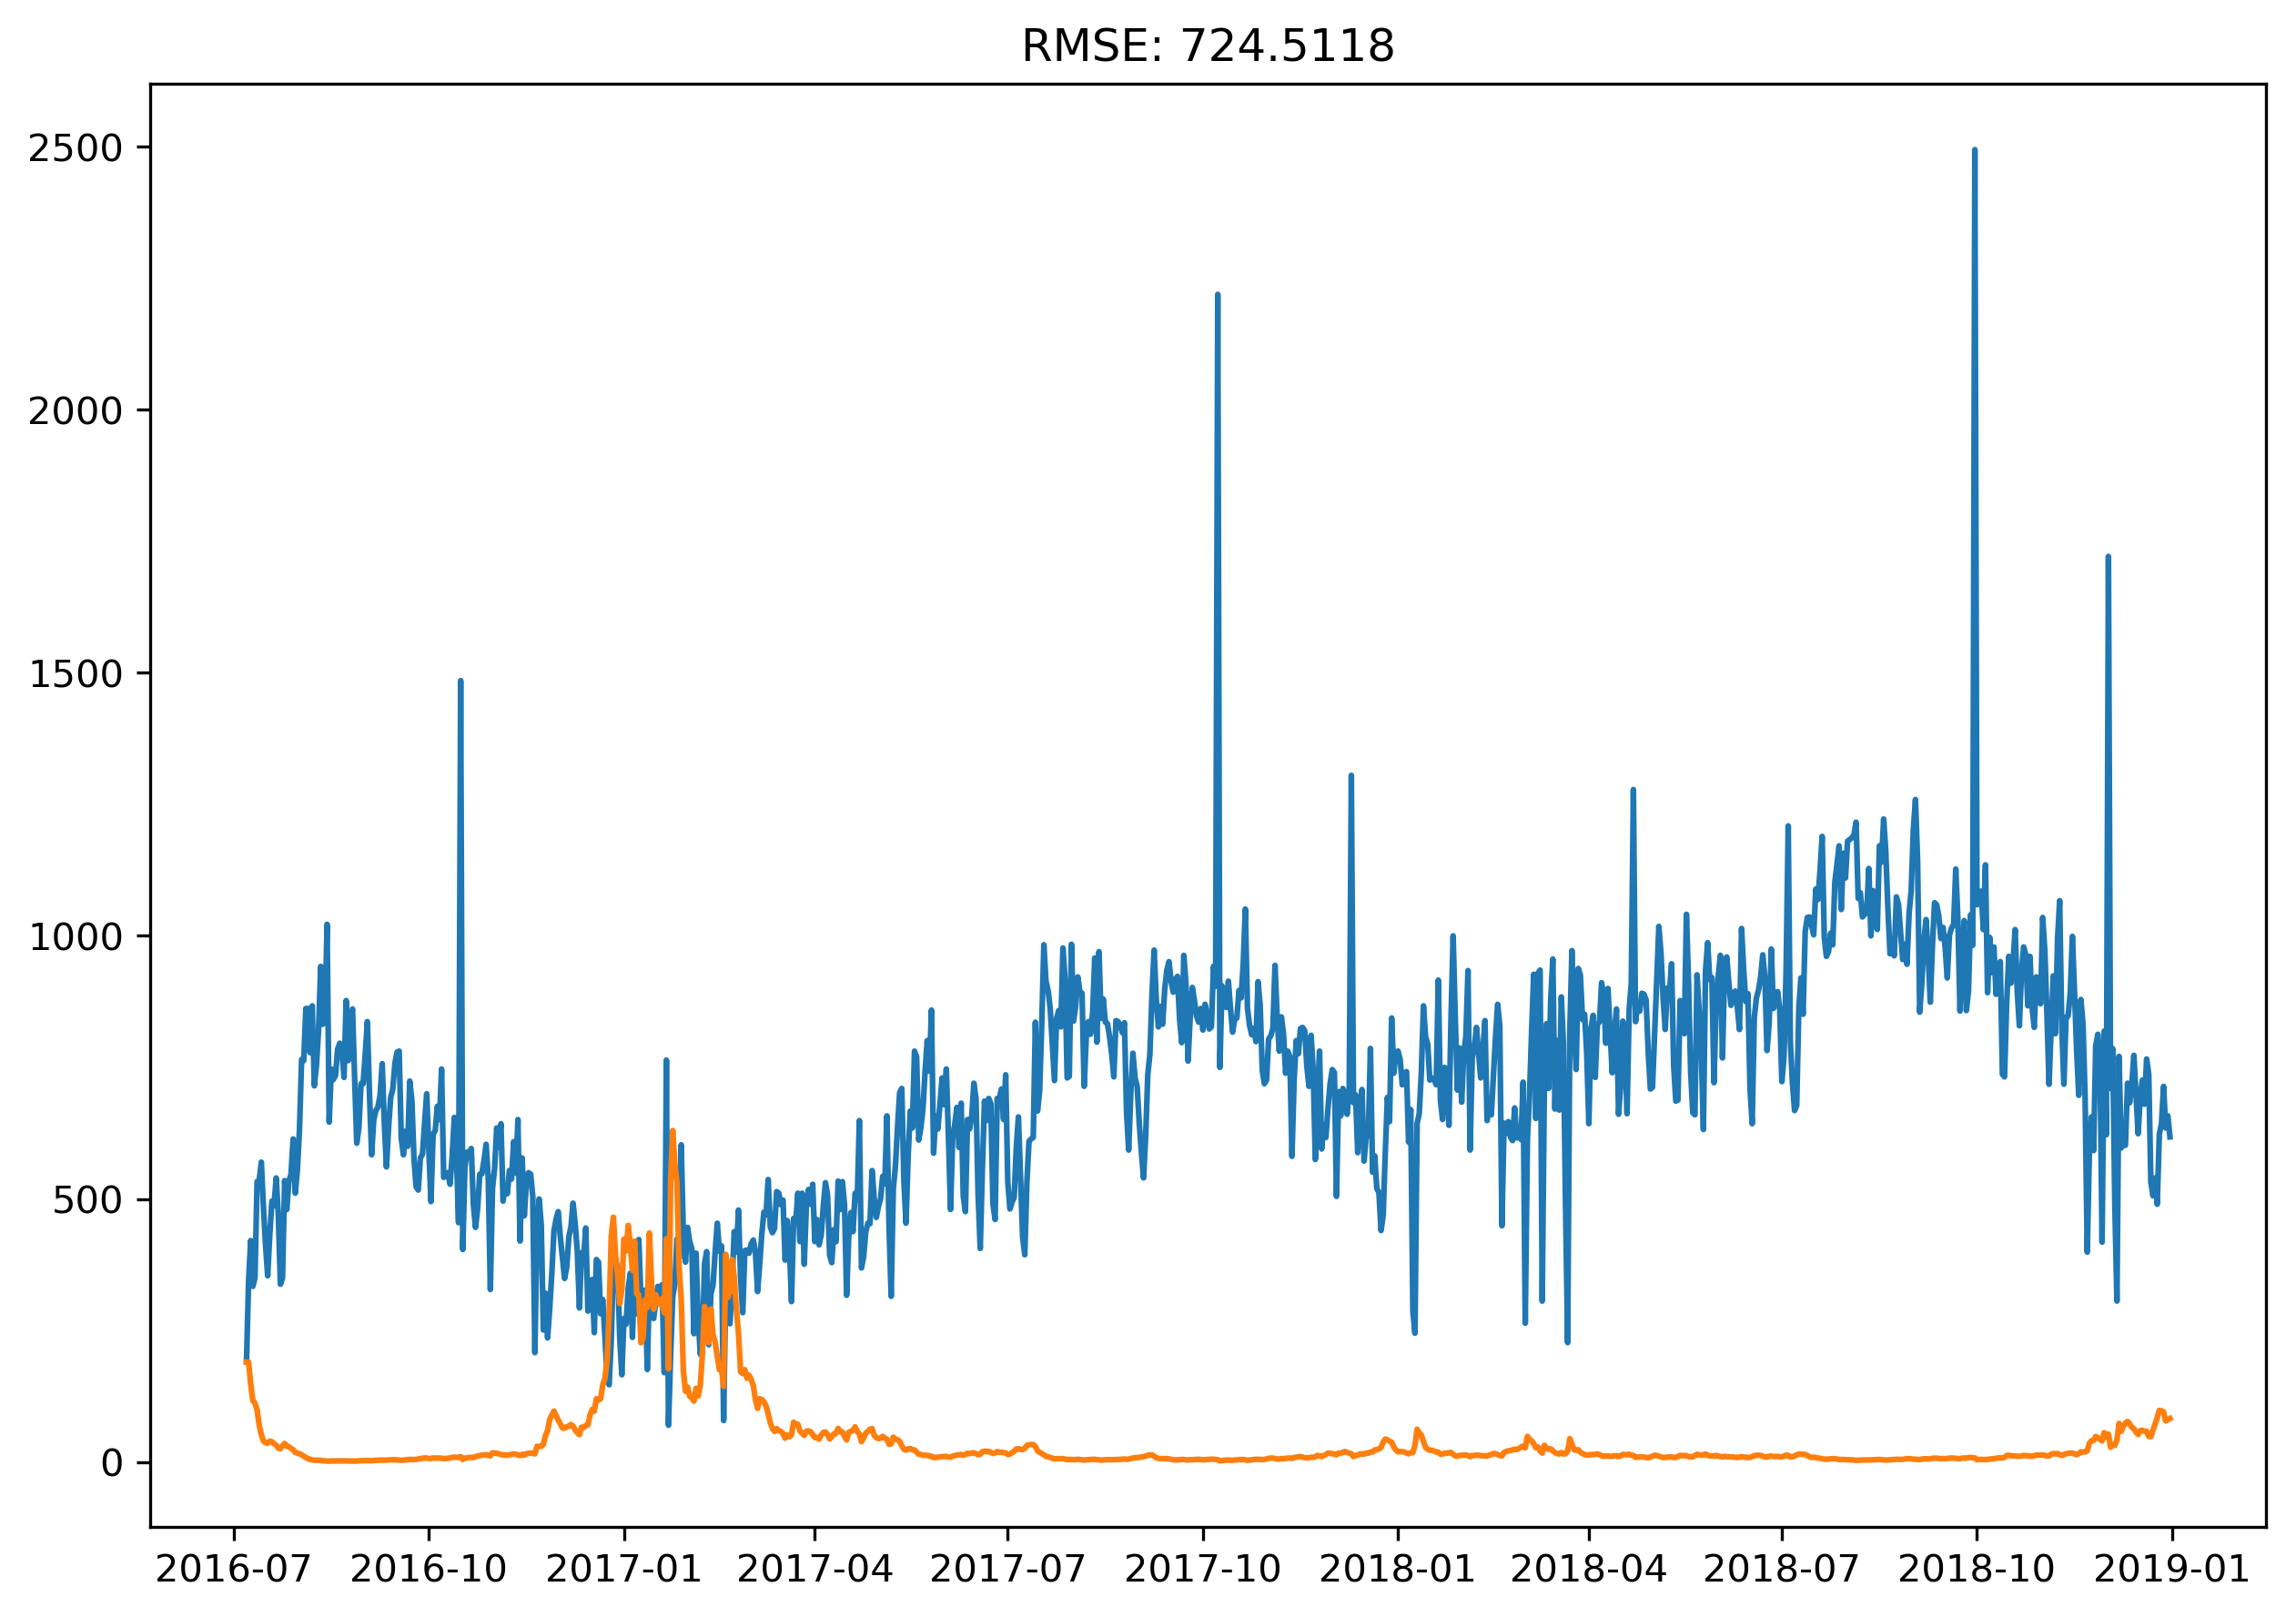

In [271]:
ts_log, ts_log_diff = log_shift(ts, 1)
model = ARIMA(ts_log, order=(7,1,7))
results = model.fit(disp=-1) 
rss = np.sum((results.fittedvalues-ts_log_diff)**2)
# 
# plt.plot(ts_log_diff)
# plt.plot(results.fittedvalues, color='red')
# plt.title('RSS: %.4f'% rss)
print("RSS of the model is = " + str(rss))

#Storing the Predicted values to the different series
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

## Since we took a lag of 1
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

## taking back

predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

# Taking exponential 
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA.head()
figure(num=None, figsize=(10, 7), dpi=300, facecolor='w', edgecolor='k')
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

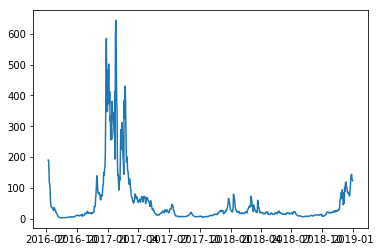

In [227]:
plt.plot(np.exp(predictions_ARIMA_log))

In [9]:
## Transform the data and remove the trend and make it stationary. 
def transform(data, window):
    ts_log = np.log(data)
    avg_log = ts_log.rolling(window= window).mean()
    diff_ts_avg = (ts_log - avg_log).dropna()
    
    return diff_ts_avg

In [245]:
ts_log.tail() , ts_log.shift().tail()

(Date
 2018-12-27    6.466145
 2018-12-28    6.570883
 2018-12-29    6.453625
 2018-12-30    6.489205
 2018-12-31    6.426488
 dtype: float64, Date
 2018-12-27    6.434547
 2018-12-28    6.466145
 2018-12-29    6.570883
 2018-12-30    6.453625
 2018-12-31    6.489205
 dtype: float64)

In [10]:
def log_shift(data, shift):
    ts_log = np.log(data)
    ts_log_diff = ts_log - ts_log.shift(shift)
    ts_log_diff = ts_log_diff.dropna()
    ts_log_diff = pd.Series(ts_log_diff.values ,index= ts_log_diff.index)
    return ts_log, ts_log_diff

In [139]:
def decompose(data):
    
    decomposition = seasonal_decompose(data)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    figure(num=None, figsize=(10, 7), dpi=300, facecolor='w', edgecolor='k')
    plt.subplot(411)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    
    return trend, seasonal, residual

In [189]:
# Use the transform function data 

from statsmodels.tsa.stattools import acf, pacf
from matplotlib.pyplot import figure

def ACF_PACF(timeseries):
    figure(num=None, figsize=(10, 7), dpi=300, facecolor='w', edgecolor='k')
    ts_log_diff = transform(timeseries, window=30)
    lag_acf = acf(ts_log_diff, nlags=20)
    lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
    #Plot ACF: 
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='green')
    plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='red')
    plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='red')
    plt.title('Autocorrelation Function')
    
    #Plot PACF:
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='green')
    plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='red')
    plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='red')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()

In [211]:
from statsmodels.tsa.arima_model import ARIMA
def ARIMA_funtion(ts_log, ts_log_diff, order):
    model = ARIMA(ts_log, order=order)
    results = model.fit(disp=-1) 
    rss = np.sum((results.fittedvalues-ts_log_diff)**2)
    figure(num=None, figsize=(10, 7), dpi=300, facecolor='w', edgecolor='k')
    plt.plot(ts_log_diff)
    plt.plot(results.fittedvalues, color='red')
    plt.title('RSS: %.4f'% rss)
    fitted = results.fittedvalues()
    print("RSS of the model is = " + str(rss))
    return fitted

In [142]:
from fbprophet import Prophet
def prophet_forecast(data, period):
    
    m = Prophet()
    m_fit = m.fit(data)
    future = m.make_future_dataframe(periods = period)
    forecast = m.predict(future)
    forecast = forecast.round(0)
    fig1 = m.plot(forecast)
    fig2 = m.plot_components(forecast)
    
    return forecast

### Performing the Timeseries 

In [112]:
df = pd.read_csv("month_data.csv")
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index("Month")
ts = df[[ "Month", "Trip_Id"]]

In [162]:
date_ts = pd.read_csv("Data_by_date.csv")
date_ts.columns = [ "ds", "y"]

In [51]:
ts = pd.Series(data= list(y) , index = date_ts.ds)

In [116]:
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(10, 7), dpi=300, facecolor='w', edgecolor='k')
# x = pd.to_datetime(date_ts.ds)
# y = date_ts.y

# plt.plot(x,y)
# plt.xlabel("Time", fontsize= 10);
# plt.ylabel("Number of Bikes Booked per day", fontsize= 10);
# plt.title("Time Series Plot", fontsize= 15)
# plt.tick_params(axis='x', rotation=45)
# plt.xticks()
# plt.savefig('Time_series_plot.png')

In [161]:
# # forcst = prophet_forecast(date_ts, 365)
# m = Prophet()
# m_fit = m.fit(date_ts)
# future = m.make_future_dataframe(periods = 365)
# forecast = m.predict(future)
# forecast = forecast.round(0)
# fig1 = m.plot(forecast)
# fig2 = m.plot_components(forecast)


In [159]:
fig1.savefig("Prophet_photo.png")

In [160]:
fig2.savefig("Prophet_fig2.png")

In [113]:
ts_log, ts_log_shit = log_shift(date_ts.y, 1)

RSS of the model is = 40.41112830936339


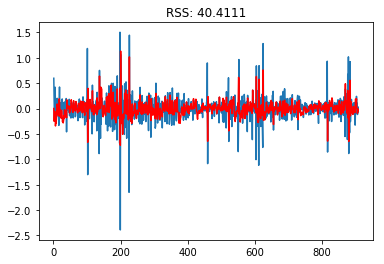

In [22]:
ARIMA_funtion(ts_log, ts_log_shit, (3,1,2))

In [118]:
# from fbprophet import Prophet
# m = Prophet(seasonality_mode='multiplicative')
# m_fit = m.fit(date_ts)
# future = m.make_future_dataframe(periods =365)
# future['cap'] = 1000

# forecast = m.predict(future)
# forecast = forecast.round(0)
# fig1 = m.plot(forecast)
# fig2 = m.plot_components(forecast)

In [119]:
# from fbprophet.plot import add_changepoints_to_plot
# fig = m.plot(forecast)
# a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [120]:
# forecast = m.predict(future)
# forecast = forecast.round(0)

In [121]:
# fig1 = m.plot(forecast)
# fig2 = m.plot_components(forecast)

In [134]:
df = pd.read_csv("Data_by_date.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
# ts = df[[ "Date", "Trip_Id"]]

In [135]:
## Using transform function to remove trend and make the data stationary (subtract mean from the original data)
ts_log_avg = transform(df, window=3)
ts_log_avg.head()

,Trip_Id
Date,
2016-07-09,0.331566
2016-07-10,-0.087965
2016-07-11,-0.045969
2016-07-12,0.295990
2016-07-13,0.142693


In [137]:
## Using logshift function to convert the data into log and producting a lag as per required. 

ts_log , ts_log_diff = log_shift(df.Trip_Id, shift=3)
print(ts_log.head())
print(ts_log_diff.head())

Date
2016-07-07    5.247024
2016-07-08    5.843544
2016-07-09    6.042633
2016-07-10    5.811141
2016-07-11    5.857933
Name: Trip_Id, dtype: float64
Date
2016-07-10    0.564117
2016-07-11    0.014389
2016-07-12    0.235889
2016-07-13    0.471126
2016-07-14    0.487703
dtype: float64


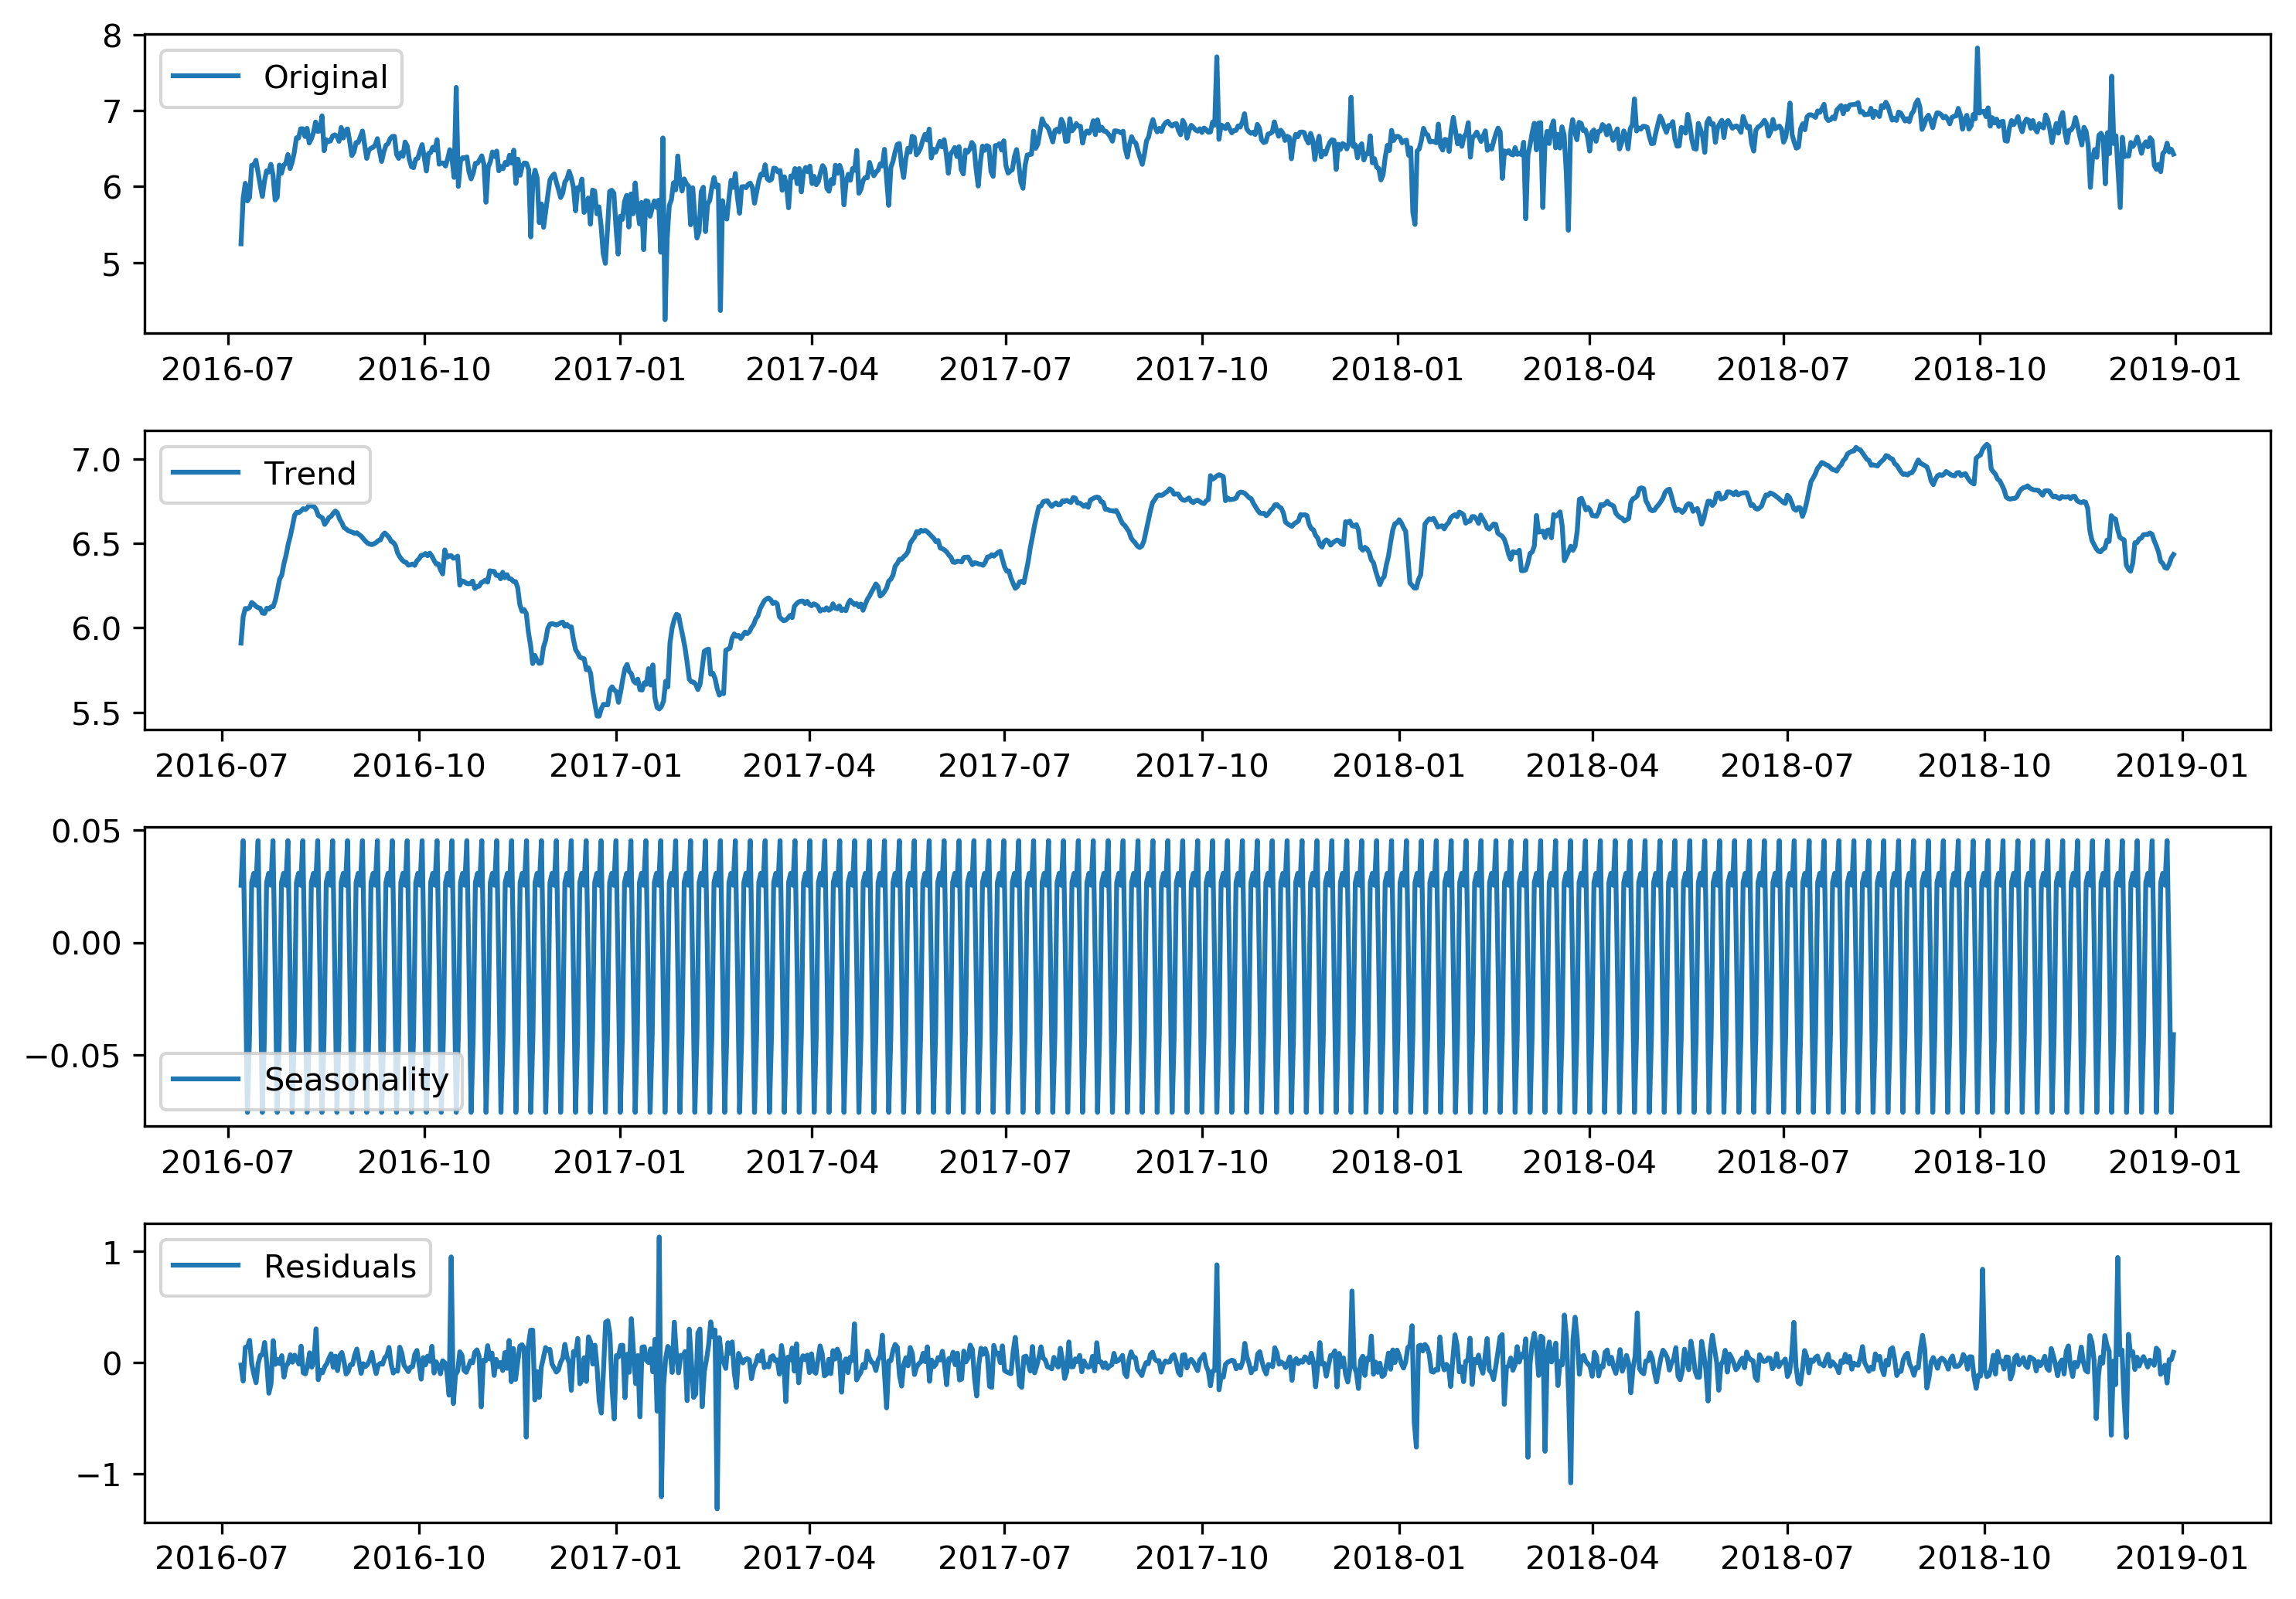

In [140]:
## Decompose the data into trend, seasonality and residual

trend, seasonal, residual = decompose(ts_log)

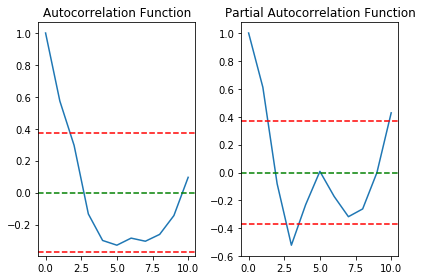

In [82]:
## Autocorelation and Partical AutoCorelation graph to identify p and q for ARIMA
ACF_PACF(ts)

RSS of the model is = 1.0884361824990458


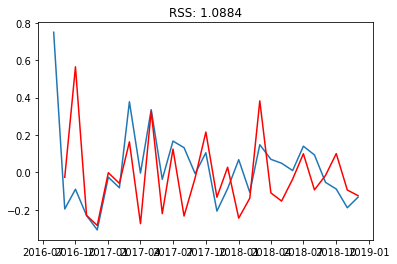

In [132]:
## Applying ARIMA Model 

ts_log , ts_log_diff = log_shift(ts.Trip_Id, shift=1)

ARIMA_funtion(ts_log=ts_log, ts_log_diff=ts_log_diff, order=(2,2,2))

RSS of the model is = 1.118221005780835


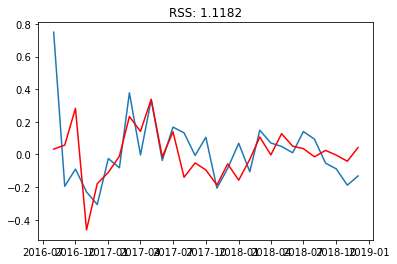

In [168]:
ts_log , ts_log_diff = log_shift(ts.Trip_Id, shift=1)

model = ARIMA(ts_log, order=(3,1,1))
results = model.fit(disp=-1) 
rss = np.sum((results.fittedvalues-ts_log_diff)**2)
plt.plot(ts_log_diff)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% rss)
print("RSS of the model is = " + str(rss))

In [169]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.Trip_Id   No. Observations:                   29
Model:                 ARIMA(3, 1, 1)   Log Likelihood                  11.255
Method:                       css-mle   S.D. of innovations              0.150
Date:                Sun, 31 Mar 2019   AIC                            -10.510
Time:                        18:35:05   BIC                             -2.306
Sample:                    08-01-2016   HQIC                            -7.941
                         - 12-01-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0327      0.005      5.949      0.000       0.022       0.043
ar.L1.D.Trip_Id     0.6752      0.159      4.255      0.000       0.364       0.986
ar.L2.D.Trip_Id     0.3576      